In [1]:
import pandas as pd

# Load df

In [14]:
manual_data = pd.read_csv('../MANUAL/FinalLabels.csv')
automated_data = pd.read_csv('../AutomatedAnnotations_ALL.csv')

In [15]:
manual_data = manual_data.drop([ 'Age_A1', 'Gender_A1', 'Ethnicity_A1',
       'Age_A2', 'Gender_A2', 'Ethnicity_A2', 'Age_A3', 'Gender_A3',
       'Ethnicity_A3'], axis=1)
manual_data.head()

,Image,FolderNames,Final_Age,Final_Gender,Final_Ethnicity
0,image0001063.jpg,Anger,Baby (0-1),Man,White
1,image0003108.jpg,Anger,Middle-aged Adult (30-49),Man,Middle Eastern
2,image0006264.jpg,Contempt,Young Adult (20-29),Woman,Black
3,image0013196.jpg,Contempt,Elderly (65+),Man,Asian
4,image0019021.jpg,Contempt,Young Adult (20-29),Woman,Asian


In [16]:
automated_data.head()

,datasetName,folderName,imageName,Age,Gender,Race
0,AffectNet - Test,anger,image0000006,30,Woman,white
1,AffectNet - Test,anger,image0000060,34,Man,white
2,AffectNet - Test,anger,image0000061,44,Man,white
3,AffectNet - Test,anger,image0000066,49,Man,white
4,AffectNet - Test,anger,image0000106,30,Man,black


# Access accuracy

In [17]:
# Standardize column names for merging
manual_data.rename(columns={"Image": "imageName", "FolderNames": "folderName"}, inplace=True)

# Standardize the string formats for merging columns
manual_data['imageName'] = manual_data['imageName'].str.strip().str.lower()
manual_data['folderName'] = manual_data['folderName'].str.strip().str.lower()
manual_data['Final_Ethnicity'] = manual_data['Final_Ethnicity'].str.strip().str.lower()
# Remove '.jpg' and '.png' extensions from manual image names
manual_data['imageName'] = manual_data['imageName'].str.replace('.jpg', '', regex=False).str.replace('.png', '', regex=False)

automated_data['imageName'] = automated_data['imageName'].str.strip().str.lower()
automated_data['folderName'] = automated_data['folderName'].str.strip().str.lower()

# Remove ' - Test' from datasetName in the automated dataset
automated_data['datasetName'] = automated_data['datasetName'].str.replace(' - Test', '', regex=False)

# Filter the automated dataset for 'AffectNet'
automated_data_filtered = automated_data[automated_data['datasetName'] == 'AffectNet']
#automated_data_filtered

#manual_data

In [24]:
merged_data_filtered = pd.merge(
    automated_data_filtered,
    manual_data,
    on=["imageName", "folderName"],
    how="inner"
)

# Define a function to map ages to categories
def age_to_category(age):
    if age <= 1:
        return "Baby (0–1 year)"
    elif 2 <= age <= 9:
        return "Child (2–9 years)"
    elif 10 <= age <= 19:
        return "Adolescent (10–19 years)"
    elif 20 <= age <= 29:
        return "Young Adult (20–29 years)"
    elif 30 <= age <= 49:
        return "Middle-aged Adult (30–49 years)"
    elif 50 <= age <= 65:
        return "Older Adult (50–65 years)"
    else:
        return "Elderly (65+ years)"

# Apply the function to the Age column
merged_data_filtered['Age'] = merged_data_filtered['Age'].apply(age_to_category)
# Convert numeric 'Age' column to string for formatting
merged_data_filtered['Age'] = merged_data_filtered['Age'].astype(str)

# Standardize string formatting for all relevant columns
merged_data_filtered['Race'] = merged_data_filtered['Race'].str.replace('/', ' ').str.strip().str.lower()
merged_data_filtered['Final_Ethnicity'] = merged_data_filtered['Final_Ethnicity'].str.replace('/', ' ').str.strip().str.lower()
merged_data_filtered['Age'] = merged_data_filtered['Age'].str.strip().str.lower()
merged_data_filtered['Final_Age'] = merged_data_filtered['Final_Age'].str.strip().str.lower()
merged_data_filtered['Gender'] = merged_data_filtered['Gender'].str.strip().str.lower()
merged_data_filtered['Final_Gender'] = merged_data_filtered['Final_Gender'].str.strip().str.lower()
# Remove the word 'years' from the 'Age' column
merged_data_filtered['Age'] = merged_data_filtered['Age'].str.replace(' years', '').str.strip()
merged_data_filtered['Age'] = (
    merged_data_filtered['Age']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.replace('years', '', regex=False)  # Remove the word 'years'
    .str.strip()
)


merged_data_filtered

,datasetName,folderName,imageName,Age,Gender,Race,Final_Age,Final_Gender,Final_Ethnicity
0,AffectNet,anger,image0001063,middle-aged adult (30-49),woman,white,baby (0-1),man,white
1,AffectNet,anger,image0003108,middle-aged adult (30-49),man,middle eastern,middle-aged adult (30-49),man,middle eastern
2,AffectNet,contempt,image0006264,young adult (20-29),woman,black,young adult (20-29),woman,black
3,AffectNet,contempt,image0013196,older adult (50-65),man,asian,elderly (65+),man,asian
4,AffectNet,contempt,image0019021,middle-aged adult (30-49),woman,asian,young adult (20-29),woman,asian
5,AffectNet,contempt,image0035153,older adult (50-65),man,white,elderly (65+),woman,white
6,AffectNet,disgust,ffhq_20,middle-aged adult (30-49),man,black,older adult (50-65),man,black
7,AffectNet,disgust,ffhq_48,young adult (20-29),man,asian,child (2-9),woman,asian
8,AffectNet,disgust,image0000866,young adult (20-29),man,black,young adult (20-29),man,black
9,AffectNet,disgust,image0002926,middle-aged adult (30-49),man,white,middle-aged adult (30-49),man,white


In [25]:
# Calculate accuracy for each category based on ground truth (Final labels)
age_accuracy = (merged_data_filtered['Age'] == merged_data_filtered['Final_Age']).mean() * 100
gender_accuracy = (merged_data_filtered['Gender'] == merged_data_filtered['Final_Gender']).mean() * 100
ethnicity_accuracy = (merged_data_filtered['Race'] == merged_data_filtered['Final_Ethnicity']).mean() * 100

# Calculate overall accuracy (all categories correct)
overall_accuracy = (
    (merged_data_filtered['Age'] == merged_data_filtered['Final_Age']) &
    (merged_data_filtered['Gender'] == merged_data_filtered['Final_Gender']) &
    (merged_data_filtered['Race'] == merged_data_filtered['Final_Ethnicity'])
).mean() * 100

# Print accuracy results
accuracy_results = {
    "Age Accuracy (%)": age_accuracy,
    "Gender Accuracy (%)": gender_accuracy,
    "Ethnicity Accuracy (%)": ethnicity_accuracy,
    "Overall Accuracy (%)": overall_accuracy
}

print("Accuracy Results:")
for key, value in accuracy_results.items():
    print(f"{key}: {value:.2f}%")


Accuracy Results:
Age Accuracy (%): 36.84%
Gender Accuracy (%): 73.68%
Ethnicity Accuracy (%): 73.68%
Overall Accuracy (%): 26.32%


# Cohen's Kappa
Given that the manual annotations are considered ground truth and the automated system produces deterministic outputs (class labels), calculating Cohen's Kappa makes sense. It will evaluate the agreement between the automated system's predictions and the ground truth (manual annotations), while accounting for chance agreement.

In [27]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa for each category
age_kappa = cohen_kappa_score(merged_data_filtered['Age'], merged_data_filtered['Final_Age'])
gender_kappa = cohen_kappa_score(merged_data_filtered['Gender'], merged_data_filtered['Final_Gender'])
ethnicity_kappa = cohen_kappa_score(merged_data_filtered['Race'], merged_data_filtered['Final_Ethnicity'])

# Display Kappa scores
kappa_results = {
    "Age Kappa": age_kappa,
    "Gender Kappa": gender_kappa,
    "Ethnicity Kappa": ethnicity_kappa,
}

print("Cohen's Kappa Results:")
for key, value in kappa_results.items():
    print(f"{key}: {value:.2f}")


Cohen's Kappa Results:
Age Kappa: 0.20
Gender Kappa: 0.40
Ethnicity Kappa: 0.68


Age Kappa (0.20 - Slight Agreement):

There is only a slight agreement between the automated system's predictions and the manual annotations for age categories.
This low Kappa score could indicate significant discrepancies in how age groups are determined by the system versus human annotators.
Gender Kappa (0.40 - Fair Agreement):

There is a fair level of agreement between the automated system and manual annotations for gender.
The automated system performs better here, but there are still notable mismatches.
Ethnicity Kappa (0.68 - Substantial Agreement):

Substantial agreement indicates that the automated system performs relatively well in predicting ethnicity categories compared to manual annotations.
This is the strongest-performing category, suggesting the system's predictions for ethnicity align more closely with human annotations.

# Plot

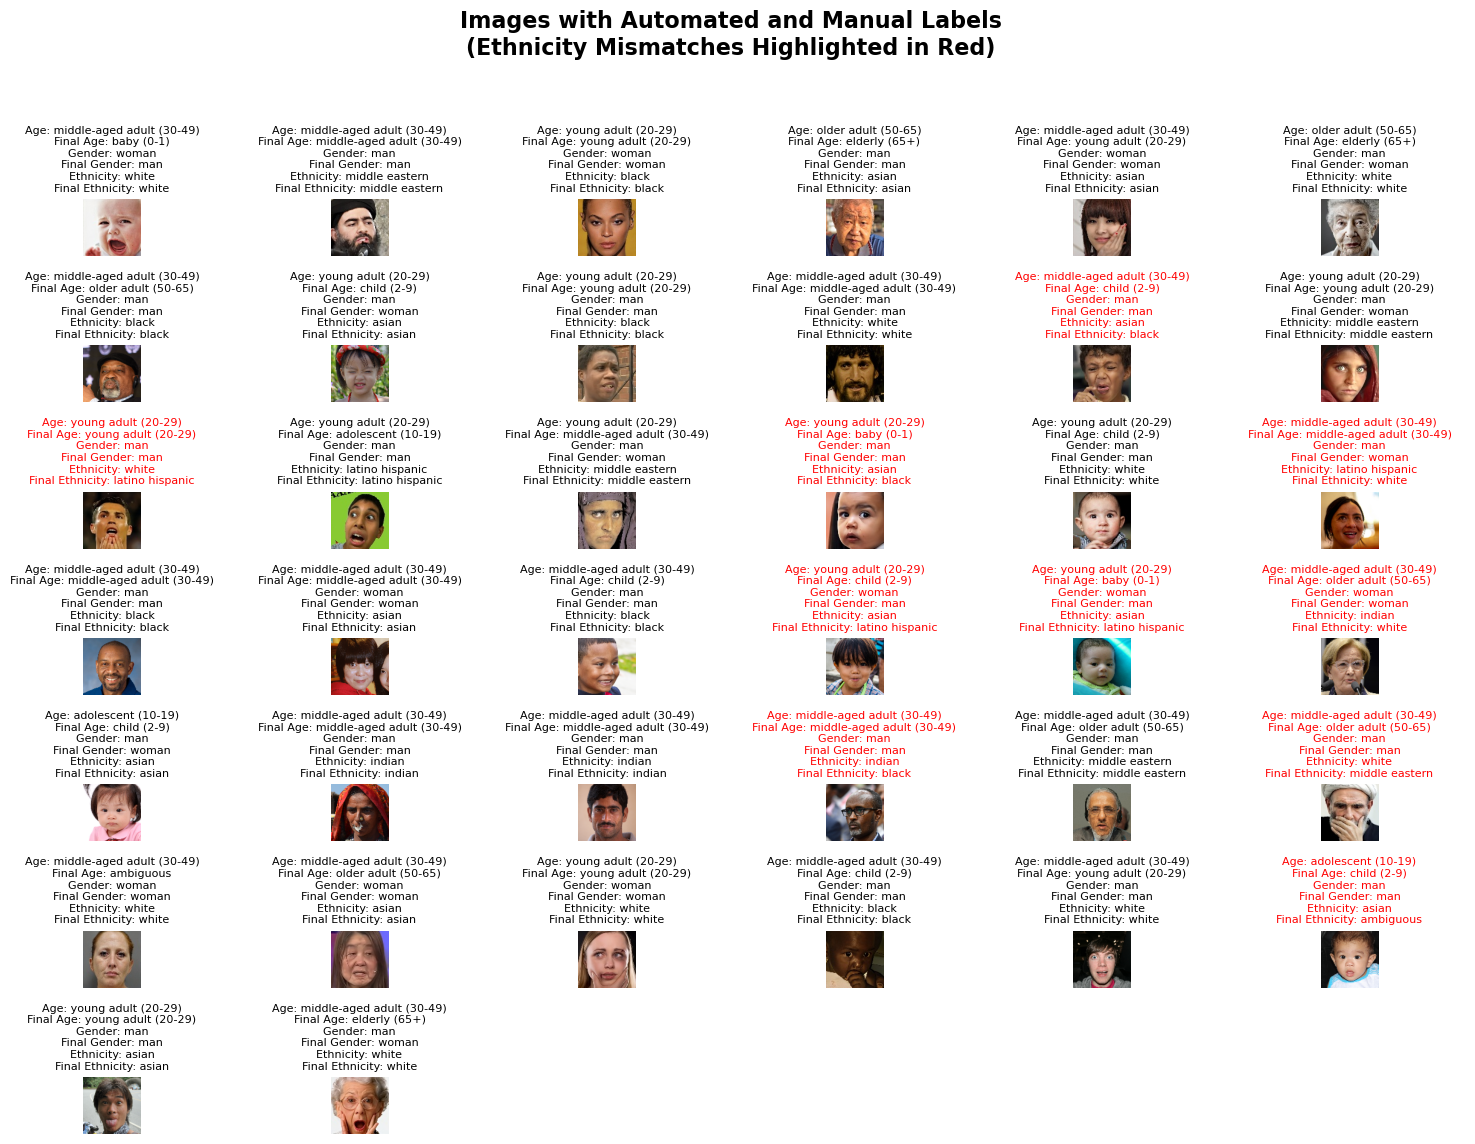

In [32]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set base directory path
base_dir = "../../datasets/AffectNet/Test"  # Replace with the actual path

# Set up the grid dimensions
fig, axes = plt.subplots(7, 6, figsize=(15, 12))  

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Track the index of the image we're displaying
for idx, (index, row) in enumerate(merged_data_filtered.iterrows()):
    if idx >= 42:  # Stop after displaying 42 images (6x7 grid)
        break

    image_name = row["imageName"]
    folder_name = row["folderName"]
    
    # Add file extension (.jpg or .png) if missing
    possible_extensions = [".jpg", ".png"]
    image_path = None
    for ext in possible_extensions:
        test_path = os.path.join(base_dir, folder_name, image_name + ext)
        if os.path.exists(test_path):
            image_path = test_path
            break

    # If the image file is not found, skip this row
    if not image_path:
        print(f"Image not found: {image_name} in folder {folder_name}")
        continue

    # Try to open the image file
    img = Image.open(image_path)

    # Display the image on the grid
    axes[idx].imshow(img)
    axes[idx].axis("off")
    
    # Prepare titles with both labels
    age = row["Age"]
    final_age = row["Final_Age"]
    gender = row["Gender"]
    final_gender = row["Final_Gender"]
    ethnicity = row["Race"]
    final_ethnicity = row["Final_Ethnicity"]

    # Check for ethnicity mismatch
    if ethnicity != final_ethnicity:
        title_color = "red"  # Highlight mismatched labels in red
    else:
        title_color = "black"  # Matching labels in black

    # Add title with both sets of labels
    title = f"Age: {age}\nFinal Age: {final_age}\n" \
            f"Gender: {gender}\nFinal Gender: {final_gender}\n" \
            f"Ethnicity: {ethnicity}\nFinal Ethnicity: {final_ethnicity}"
    axes[idx].set_title(title, fontsize=8, color=title_color)

# Hide any remaining empty subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

# Add a main title for the entire figure
fig.suptitle("Images with Automated and Manual Labels\n(Ethnicity Mismatches Highlighted in Red)", 
             fontsize=16, fontweight="bold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

In [33]:
if os.path.exists(base_dir):
    print(f"The directory exists: {base_dir}")
else:
    print(f"The directory does not exist: {base_dir}")

The directory exists: ../../datasets/AffectNet/Test
